<a href="https://colab.research.google.com/github/kwon0136/MachineLearning/blob/master/190408/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-means Clustering
* 목적함수 값이 최소화될 때까지 클러스터의 중심(centroid) 위치와 각 데이터가 소속될 클러스터를 반복해서 찾는다. 이 값을 inertia라고도 한다.

* J=∑k=1K∑i∈Ckd(xi,μk)
  *   K: 클러스터의 갯수
  * Ck: k 번째 클러스터에 속하는 데이터의 집합
  * μk: k 번째 클러스터의 중심위치
  * d: xi, μk  두 데이터사이의 거리 
  * d(xi,μk) = ||xi−μk||2
  
  
* 세부 알고리즘
 1.   임의의 중심값  μk  를 고른다. 보통 데이터 샘플 중에서  K 개를 선택
 2.   중심에서 각 데이터까지의 거리를 계산
 3.  각 데이터에서 가장 가까운 중심을 선택하여 클러스터 갱신
 4.  다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복

* scikit-learn의 cluster 서브패키지는 KMeans 클러스터링을 위한 KMeans 클래스를 제공
  * n_clusters: 클러스터의 갯수
  * init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
  * n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택
  * max_iter: 최대 반복 횟수.
  * random_state: 시드값.


https://astralworld58.tistory.com/59
https://www.slideshare.net/JeonghunYoon/05-k-means-clustering-kmeans

In [0]:
from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("Sample01-k-means.csv")
data.head(1)

,x,y
0,25,79


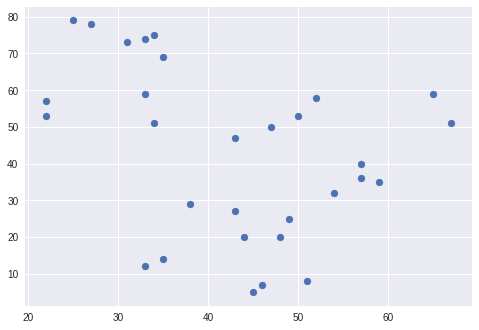

In [0]:
plt.scatter(data['x'], data['y'])
plt.show()

In [0]:
# KMeans library load

from sklearn.cluster import KMeans

In [0]:
# KMeans class 생성

kmeans = KMeans(n_clusters=2).fit(data)
centroids = kmeans.cluster_centers_

In [0]:
# 중심값 (!= dataset의 값 중 하나)

centroids

array([[38.75      , 61.625     ],
       [47.07142857, 22.14285714]])

In [0]:
#**************************************************************************

kmeans.labels_.astype(float)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

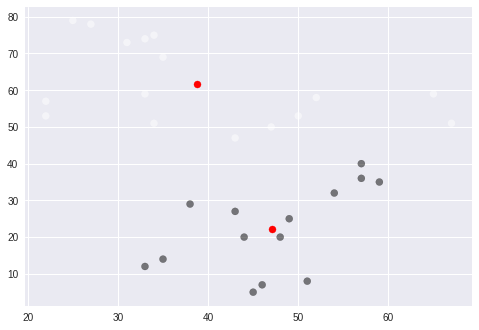

In [0]:
# dataset (c, s: 점 크기, alpha: 색 진하기)
plt.scatter(data['x'], data['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

# 중심점
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

# 그래프 출력
plt.show()

###scipy.spatial.distance import cdist

Computes distance between each pair of the two collections of inputs

In [0]:
# K값 찾기********************************************************************************************

from scipy.spatial.distance import cdist
def testFunc(x, y):
    x1 = x
    y1 = y
    data2 = np.array(list(zip(x1, y1))).reshape(len(x1),2) #************************************************
    data3 = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(data2)
        
        # kmeansModel 에 fit 2번??***************************************************************************
        kmeanModel.fit(data2)

        #  kmeanModel.cluster_centers_, 'euclidean': "ordinary" straight-line distance between two points
        d = cdist(data2, kmeanModel.cluster_centers_, 'euclidean') 
        d2 = sum(np.min(d, axis=1)) / data2.shape[0] #**********************************************************
        data3.append(d2)
    
    return data3


In [0]:
test = testFunc(data['x'], data['y'])
test

[23.693201938148384,
 14.455398125748394,
 10.574911476191717,
 8.763082712451988,
 7.4850203876301915,
 6.060632821706659,
 5.120189656566015,
 4.261941024585835,
 3.7908030797645904]

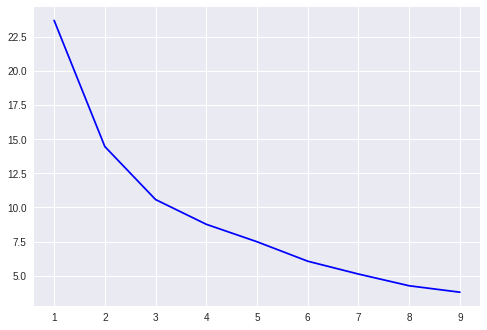

In [0]:
plt.plot(range(1,10), test, 'bx-')
plt.show()